## Illustration

-- This notebook is to construct an illustrative example to show the direction of the cross-sectional shocks matter

-- author: Zhu,Wu

-- date: 2020-07-25

1. Symmetric production network 
$$s_t = (1/3,1/3,1/3)$$
2. Innovation network 
\[\begin{bmatrix}
0.32666667 & 0.06666667 & 0.06666667 \\ 
0.06666667& 0.04666667& 0.04666667 \\ 
0.06666667 & 0.04666667 & 0.04666667 
\end{bmatrix}\]

In [2]:
import numpy as np

In [3]:
v1 = np.array([[4,1,1]]).T
v2 = np.array([[-1,2,2]]).T
v3 = np.array([[0,-1,1]]).T
W = (0.6*np.matmul(v1,v1.T) + 0.2*np.matmul(v2,v2.T) + 0*np.matmul(v3,v3.T))/30
w,v = np.linalg.eig(W)
v1,v2,v3 = v[:,0],v[:,1],v[:,2]
rho = 0.40
share = np.array([[1/3,1/3,1/3]]).T

In [4]:
def expected_effects_on_growth(shock,rho,W,share = share,T = 10,eta = 3):
    
    """
    calculate the expected effects of shocks on future growth
    """
    n_dims = W.shape[0]
    A_matrix = (1-rho)*np.eye(n_dims) + W
    
    effect = np.zeros((T,1))
    A_power = np.eye(n_dims)
    for t in range(T):
        effect[t] = (1/(1-eta))*np.matmul(np.matmul(shock,A_power),share)
        A_power = np.matmul(A_power,A_matrix)
    
    return effect

In [55]:
T = 10
shock1 = np.array([-0.2,-0.05,-0.05])/0.14
effect1 = expected_effects_on_growth(shock1,rho,W,share = share,T = 10,eta = 0.3)

shock2 = np.array([0.1,-0.2,-0.2])/0.14
effect2 = expected_effects_on_growth(shock2,rho,W,share = share,T = 10,eta = 0.3)

shock3 = np.array([0.1,-0.2,-0.2])/0.14
effect3 = expected_effects_on_growth(shock2,0.2,W,share = share,T = 10,eta = 0.3)

In [9]:
import matplotlib.pyplot as plt

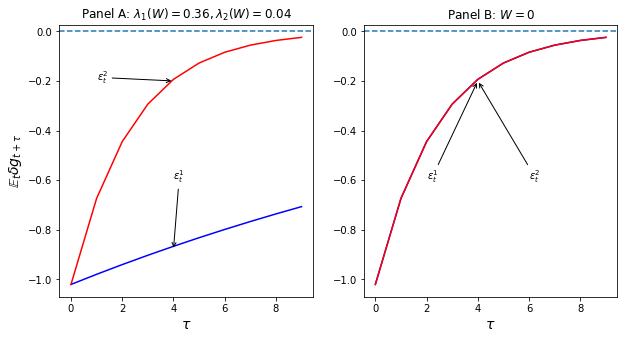

In [96]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
ax[0].plot(np.arange(T),effect1,color = 'blue',label = 'Scenario 1')
ax[0].plot(np.arange(T),effect2,color = 'red',label = 'Scenario 2')
ax[0].axhline(y=0, xmin=0, xmax=1,linestyle = '--')
ax[0].set_xlabel(r"$\tau$",fontsize = 14)
ax[0].set_ylabel(r"$\mathbb{E}_t\delta g_{t+\tau}$",fontsize = 14)

ax[0].annotate(r"$\epsilon_t^{2}$", xy=(4, -0.2), xytext=(1, -0.2),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax[0].annotate(r"$\epsilon_t^{1}$", xy=(4, -0.88), xytext=(4, -0.6),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax[0].set_title(r"Panel A: $\lambda_1(W) = 0.36,\lambda_2(W) = 0.04$")

ax[1].plot(np.arange(T),effect2,color = 'blue',label = 'Scenario 1')
ax[1].plot(np.arange(T),effect2,color = 'red',label = 'Scenario 2')
ax[1].axhline(y=0, xmin=0, xmax=1,linestyle = '--')
ax[1].set_xlabel(r"$\tau$",fontsize = 14)
ax[1].annotate(r"$\epsilon_t^{1}$", xy=(4, -0.2), xytext=(2, -0.6),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax[1].annotate(r"$\epsilon_t^{2}$", xy=(4, -0.2), xytext=(6, -0.6),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax[1].set_title(r"Panel B: $W = 0$")

"""
ax[1,0].plot(np.arange(T),effect3,color = 'blue',label = 'Scenario 1')
ax[1,0].plot(np.arange(T),effect3,color = 'red',label = 'Scenario 2')
ax[1,0].axhline(y=0, xmin=0, xmax=1,linestyle = '--')
ax[1,0].set_xlabel(r"$\tau$",fontsize = 14)
ax[1,0].annotate(r"$\epsilon_t^{1}$", xy=(3.5, -0.6), xytext=(1, -0.4),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax[1,0].annotate(r"$\epsilon_t^{2}$", xy=(3.5, -0.6), xytext=(6, -0.2),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax[1,0].set_title(r"Panel C: $\lambda_1(W) = \lambda_2(W) = \lambda_3(W) = 0.2$")

fig.tight_layout(pad=2.0)
ax[1,1].set_axis_off()
ax[1,0].set_axis_off()
"""
plt.savefig("/Users/wuzhu/Dropbox/Wu_Yang/paper/an_illustrative_example.png")
plt.savefig("/Users/wuzhu/Dropbox/Wu_Yang/slides/an_illustrative_example.png")

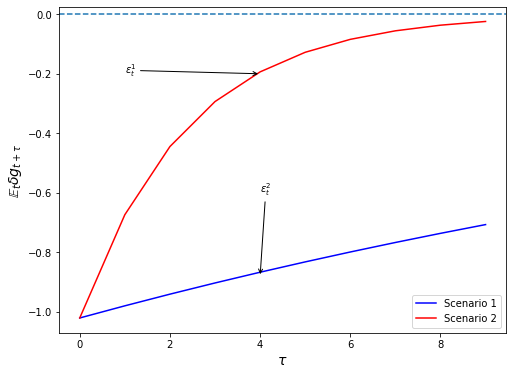

In [10]:
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(np.arange(T),effect1,color = 'blue',label = 'Scenario 1')
ax.plot(np.arange(T),effect2,color = 'red',label = 'Scenario 2')
ax.axhline(y=0, xmin=0, xmax=1,linestyle = '--')
ax.set_xlabel(r"$\tau$",fontsize = 14)
ax.set_ylabel(r"$\mathbb{E}_t\delta g_{t+\tau}$",fontsize = 14)
ax.legend()
#plt.title("The Effects of Cross-sectional Shocks on Expected Growth",pad = 15)
### Add annotation
# the arrow
plt.annotate(r"$\epsilon_t^{1}$", xy=(4, -0.2), xytext=(1, -0.2),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.annotate(r"$\epsilon_t^{2}$", xy=(4, -0.88), xytext=(4, -0.6),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.savefig("/Users/wuzhu/Dropbox/Wu_Yang/paper/an_illustrative_example.png")
plt.savefig("/Users/wuzhu/Dropbox/Wu_Yang/slides/an_illustrative_example.png")

In [206]:
plt.title?